# Project: Investigate a Dataset - No Show Appointments

## Introduction

### Dataset Description 

This dataset was collected from a hundred thousand medical appointments in Brazil.
Various observations about each appointment were recorded.
This dataset focuses on whtehr or not the patients showed up for their scheduled appointments.

'PatientID' is the individual identifier for each patient.
'AppointmentID' is the identification number for each individual appointment scheduled.
'Gender' is the biolgical sex of the individual.
'ScheduledDay' is the day the patient scheduled the appointment.
'AppointmentDay' is the day the appointment is scheduled to take place.
'Age' is the age of the patient.
'Neighborhood' indicates the location of the hospital.
'Scholarship' is status of enrollment in the Brasilian welfare program.
'Hipertension' indicates whether or not the patient has a history of hypertension.
'Diabetes' indicates whether or not the patient has a history of diabetes.
'Alcoholism' indicates whether or not the patient has a history of alcoholism.
'Handcap' indicates whether or not the patient is handicapped.
'SMS_received' indicates if the patient was sent a text message reminder.
'No-show' indicated whether or not the patient was present for the appointment.


### Questions for Analysis

1. What characteristics are most common among patients that schedule appointments?
  
  
2. What characteristics are most common among patients that do not show up for their appointments?



### Importing Libraries

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

### Data Gathering

In [2]:
# Loading the dataset

appt_df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

### Data Assessment

In [3]:
appt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
appt_df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
appt_df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
9956,7.458635e+13,5631845,F,2016-04-28T07:29:03Z,2016-05-04T00:00:00Z,39,ROMÃO,0,0,0,0,0,0,No
41157,5.417362e+14,5642630,F,2016-04-29T16:32:34Z,2016-05-24T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,Yes
79879,1.838176e+12,5652331,M,2016-05-03T09:57:31Z,2016-05-03T00:00:00Z,1,SÃO PEDRO,0,0,0,0,0,0,No
83107,6.912466e+11,5633473,F,2016-04-28T09:29:47Z,2016-05-18T00:00:00Z,30,ITARARÉ,1,0,0,0,0,0,No
55650,5.265370e+12,5663293,M,2016-05-05T09:47:57Z,2016-05-05T00:00:00Z,16,MARUÍPE,0,0,0,0,0,0,No
95302,8.211527e+12,5757894,M,2016-06-01T09:58:10Z,2016-06-01T00:00:00Z,9,CARATOÍRA,1,0,0,0,0,0,Yes
50588,4.422876e+12,5645556,F,2016-05-02T10:05:05Z,2016-05-18T00:00:00Z,42,SANTOS DUMONT,0,0,0,0,0,0,No
28593,7.925227e+13,5626379,M,2016-04-27T08:10:00Z,2016-05-04T00:00:00Z,6,FORTE SÃO JOÃO,0,0,0,0,0,1,No
44201,4.614539e+13,5685223,M,2016-05-11T09:56:00Z,2016-05-11T00:00:00Z,1,CONSOLAÇÃO,0,0,0,0,0,0,No
96684,4.366798e+13,5657444,F,2016-05-04T09:22:07Z,2016-06-07T00:00:00Z,4,CENTRO,0,0,0,0,0,1,No


In [6]:
appt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
appt_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The AppointmentID values are ints and should be strings. ScheduledDay and AppointmentDay should both be in datetime format instead of strings. Column names have typos, inconsistant capitilization, and inconsistant formatting. All yes or no columns, such as Alcoholism, SMS_recieved, and No-show, should be bolleans, instead of ints and strings.

### Data Cleaning

Before I begin cleaning the data, I will make a copy of the original dataframe.

In [8]:
# Creating a copy of the dataset

appt_copy = appt_df.copy()

Here I have changed the column names to be more consistent and descriptive.

In [9]:
# Changing the column names to correct misspellings and to make them more concide and readable.

appt_copy.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age','neighbourhood', 
                   'bolsa_familia', 'hypertension', 'diabetes', 'alcoholism', 'handicapped', 'received_sms', 'arrival_status']

In the next few steps I have changed to data types of the columns as well as the values in the columns to be more useful for analysis.

In [10]:
# Changing the data type of the appointment_id column to string

appt_copy['appointment_id'] = appt_copy['appointment_id'].astype(str)

In [11]:
# Changing the data type of the scheduled_day column to datetime

appt_copy['scheduled_day'] = pd.to_datetime(appt_copy.scheduled_day)

In [12]:
# Changing the data type of the appointment_day column to datetime

appt_copy['appointment_day'] = pd.to_datetime(appt_copy.appointment_day)

In [13]:
# Changing the data type of the bolsa_familia column to string and changing the values to 'Enrolled' and 'Not Enrolled'

appt_copy['bolsa_familia'] = appt_copy['bolsa_familia'].astype(str)
appt_copy['bolsa_familia'] = appt_copy['bolsa_familia'].apply(lambda x: 'Enrolled' if x == '1' else 'Not Enrolled')

In [14]:
# Changing the data type of the hypertension column to string and changing the values to 'Yes' and 'No'

appt_copy['hypertension'] = appt_copy['hypertension'].astype(str)
appt_copy['hypertension'] = appt_copy['hypertension'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [15]:
# Changing the data type of the diabetes column to string and changing the values to 'Yes' and 'No'

appt_copy['diabetes'] = appt_copy['diabetes'].astype(str)
appt_copy['diabetes'] = appt_copy['diabetes'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [16]:
# Changing the data type of the alcoholism column to string and changing the values to 'Yes' and 'No'

appt_copy['alcoholism'] = appt_copy['alcoholism'].astype(str)
appt_copy['alcoholism'] = appt_copy['alcoholism'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [17]:
# Changing the data type of the handicapped column to string and changing the values to 'Yes' and 'No'

appt_copy['handicapped'] = appt_copy['handicapped'].astype(str)
appt_copy['handicapped'] = appt_copy['handicapped'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [18]:
# Changing the data type of the received_sms column to string and changing the values to 'Yes' and 'No'

appt_copy['received_sms'] = appt_copy['received_sms'].astype(str)
appt_copy['received_sms'] = appt_copy['received_sms'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [19]:
# Changing the data type of the arrival_status column to string and changing the values to 'Arrived' and 'Did Not Arrive'

appt_copy['arrival_status'] = appt_copy['arrival_status'].astype(str)
appt_copy['arrival_status'] = appt_copy['arrival_status'].apply(lambda x: 'Did Not Arrive' if x == 'Yes' else 'Arrived')

Now that the data had been cleaned, I checked a random sample to make sure the changes were made correctly. I also checked the data types of each column to make sure they were correct.

In [20]:
appt_copy.sample(5)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,bolsa_familia,hypertension,diabetes,alcoholism,handicapped,received_sms,arrival_status
56051,5.435124e+12,5660035,F,2016-05-04 15:21:46+00:00,2016-05-04 00:00:00+00:00,51,REDENÇÃO,Not Enrolled,No,No,No,No,No,Arrived
85659,8.882854e+14,5762100,F,2016-06-02 07:22:59+00:00,2016-06-02 00:00:00+00:00,15,CARATOÍRA,Enrolled,No,No,No,No,No,Arrived
1135,6.714635e+09,5576760,F,2016-04-13 08:56:03+00:00,2016-04-29 00:00:00+00:00,19,GURIGICA,Not Enrolled,No,No,No,No,Yes,Did Not Arrive
90107,9.649300e+10,5768669,F,2016-06-03 07:53:09+00:00,2016-06-03 00:00:00+00:00,6,GRANDE VITÓRIA,Not Enrolled,No,No,No,No,No,Arrived
82281,7.994689e+13,5587321,F,2016-04-15 08:32:51+00:00,2016-05-09 00:00:00+00:00,78,DA PENHA,Not Enrolled,No,No,No,No,No,Did Not Arrive


In [21]:
appt_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  float64            
 1   appointment_id   110527 non-null  object             
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   bolsa_familia    110527 non-null  object             
 8   hypertension     110527 non-null  object             
 9   diabetes         110527 non-null  object             
 10  alcoholism       110527 non-null  object             
 11  handicapped      110527 non-null  object             
 12  received_sms     110527 non-null  object             
 13 

## Exploratory Data Analysis

##  What characteristics are most common among patients that schedule appointments?

### Examining the 'age' values

In [22]:
appt_copy['age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [23]:
appt_copy['age'].value_counts()[0:10:1]

0     3539
1     2273
52    1746
49    1652
53    1651
56    1635
38    1629
59    1624
2     1618
50    1613
Name: age, dtype: int64

In [24]:
appt_copy['age'].value_counts()[104:93:-1]

-1       1
 99      1
 102     2
 100     4
 115     5
 98      6
 97     11
 96     17
 95     24
 94     33
Name: age, dtype: int64

In [25]:
round(appt_copy['age'].mean(), 0)

37.0

After examining the 'age' values, it was determined that there were many values that were less than 0 and some values that was greater than 100. These values were removed from the dataset.
Furthermore, such a wide range of ages was found to be unhelpful for the analysis. Therefore, the ages were grouped into 10 year intervals and appended to the dataset as a new column.
Original age values were kept in the dataset for reference.

In [26]:
# Changing the data type of the age column to integer

appt_copy['age'] = appt_copy['age'].astype(int)

In [27]:
# Removing the outliers from the age column

appt_copy = appt_copy[appt_copy['age'] <= 100]
appt_copy = appt_copy[appt_copy['age'] > 0]

In [28]:
# Creating a new column called age_range to categorize the age column

appt_copy['age_range'] = pd.cut(appt_copy['age'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [29]:
# Changing the data type of the age_range column to string

appt_copy['age_range'] = appt_copy['age_range'].astype(str)

In [30]:
# Removing the brackets from the age_range column and replacing the comma with a hyphen

appt_copy['age_range'] = appt_copy['age_range'].str.replace('[\[\]()]', '', regex=True)
appt_copy['age_range'] = appt_copy['age_range'].str.replace('[,]', '-', regex=True)

Now that I had the ages grouped and the column appropriately named formatted I plotted the age_range data to see the distribution of age ranges as well as what trends exsisted within the ages vs number of scheduled appointments.

In [31]:
# Group the data by age range and count the number of occurrences

age_range_counts = appt_copy.groupby(['age_range'])['age'].count()

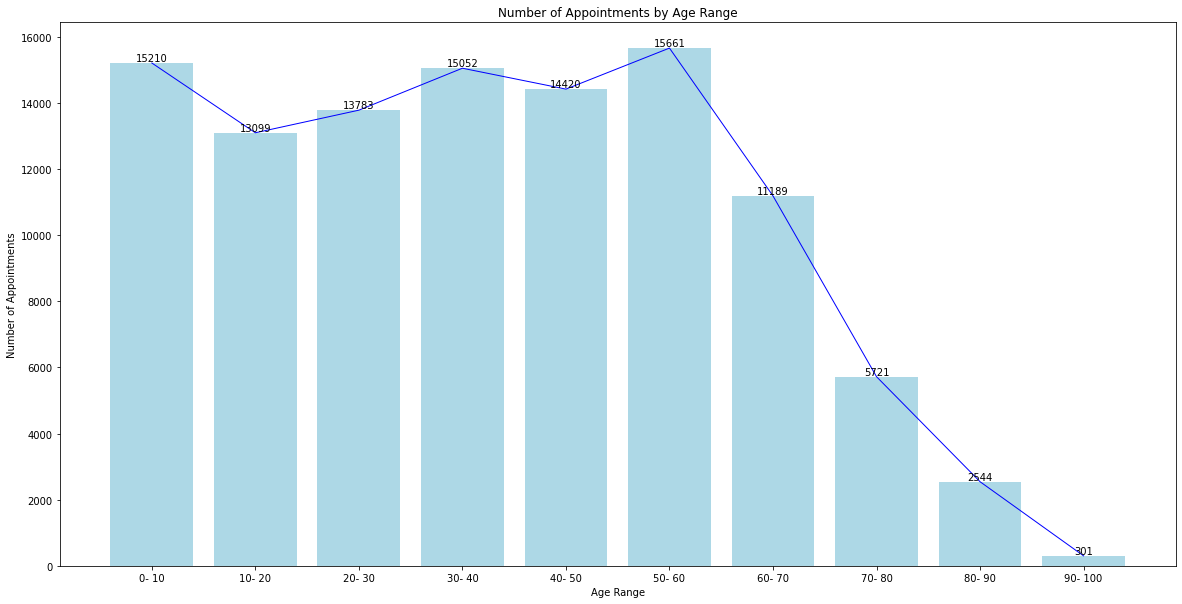

age_range
0- 10      15210
10- 20     13099
20- 30     13783
30- 40     15052
40- 50     14420
50- 60     15661
60- 70     11189
70- 80      5721
80- 90      2544
90- 100      301
Name: age, dtype: int64

In [32]:
# Plot the age range counts as a bar graph

plt.figure(figsize=(20,10))
plt.bar(age_range_counts.index, age_range_counts.values, color = 'lightblue')
plt.plot(age_range_counts.index, age_range_counts.values, color = 'blue', marker = 'o', linestyle = 'solid', linewidth = 1, markersize = 0)

# Add a title and axis labels to the graph

plt.title('Number of Appointments by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=0)
plt.bar_label(plt.gca().containers[0], fmt = '%.0f')


# Show the plot

plt.show()

# Print the age range counts table

age_range_counts

What can be observed from the above graph is that the number of appointments scheduled decreases consistently and rapidly after age 60.

I have also made the judgement call that the age range of 90 - 100, which is significantly smaller than the other age ranges, is not worth including in the analysis. Therefore, I have removed those values from my analysis dataset.

### Examing the 'gender' values

In [33]:
appt_copy['gender'].value_counts()

F    70111
M    36869
Name: gender, dtype: int64

In [34]:
# Creating a new variable that groups the dataset by gender and counts the number of occurrences

gender_counts = appt_copy.groupby(['gender'])['appointment_id'].count()

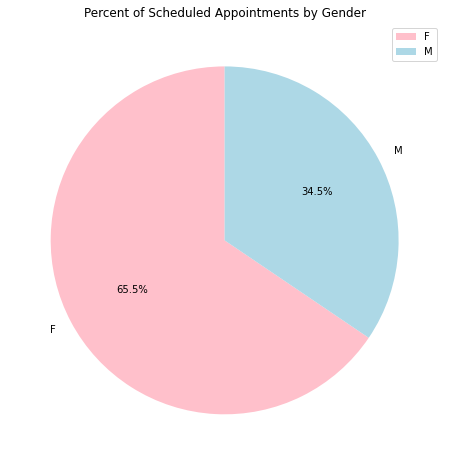

In [35]:
# Creates a pie chart of the percentage of males and females that scheduled appointments

plt.figure(figsize=(10,8))
plt.pie(gender_counts, labels= gender_counts.index, autopct='%1.1f%%', startangle=90, colors = ['pink', 'lightblue'])
plt.title('Percent of Scheduled Appointments by Gender')
plt.legend()

# Show the plot

plt.show()

The above pie chart demonstrates appointments are scheduled for female patients far more often than for male patients, with nearly double the percentage of appointments being for female patients.

### Examining the 'bolsa_familia' values

In [36]:
appt_copy['bolsa_familia'].value_counts()

Not Enrolled    96171
Enrolled        10809
Name: bolsa_familia, dtype: int64

In [37]:
# Creating a new variable that groups the dataset by bolsa_familia and counts the number of occurrences

bolsa_familia_counts = appt_copy.groupby(['bolsa_familia'])['appointment_id'].count()

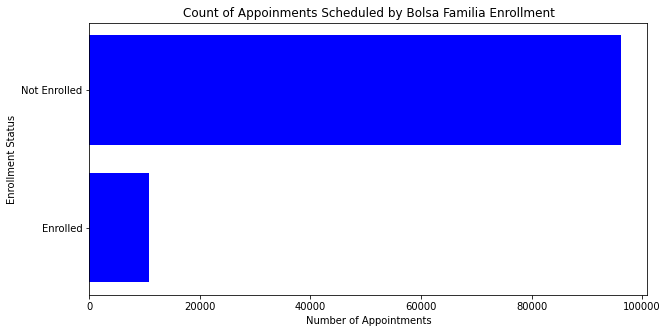

In [38]:
# Graph the number of appointments scheduled by enrollment status

plt.figure(figsize = (10,5))
plt.barh(bolsa_familia_counts.index, bolsa_familia_counts.values, color = 'blue')
plt.title('Count of Appoinments Scheduled by Bolsa Familia Enrollment')
plt.xlabel('Number of Appointments')
plt.ylabel('Enrollment Status')

# Show the plot

plt.show()

### Examing how the combined 'bolsa_familia' and 'gender' values affect the number of scheduled appointments.

In [39]:
# Creating a new variable that groups the dataset by bolsa_familia and gender and counts the number of occurrences

bg_grouped = appt_copy.groupby(['bolsa_familia', 'gender']).size().reset_index(name = 'counts')

In [40]:
# Creating a pivot table based on the bg_grouped variable

bg_pivot = bg_grouped.pivot(index = 'bolsa_familia', columns = 'gender', values = 'counts')

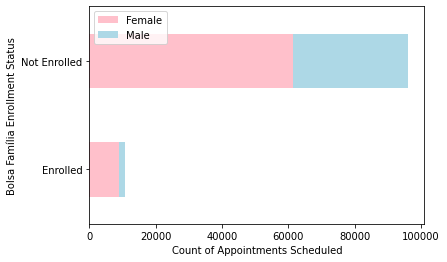

In [41]:
# Plotting the pivot table as a stacked bar graph

bg_barh = bg_pivot.plot(kind = 'barh', stacked = True, color = ['pink', 'lightblue'])
plt.xlabel('Count of Appointments Scheduled')
plt.ylabel('Bolsa Família Enrollment Status')
plt.legend(['Female', 'Male'], loc = 'upper left')

In [42]:
# Creating a new variable that groups the dataset by bolsa_familia and gender and counts the number of occurrences

gb_grouped = appt_copy.groupby(['gender', 'bolsa_familia']).size().reset_index(name = 'counts')

In [43]:
# Creating a pivot table based on the bg_grouped variable

gb_pivot = gb_grouped.pivot(index = 'gender', columns = 'bolsa_familia', values = 'counts')

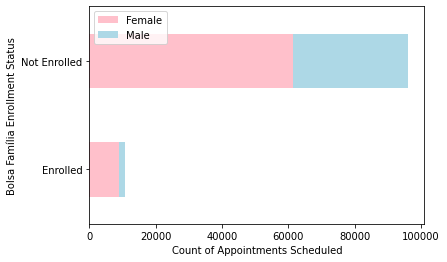

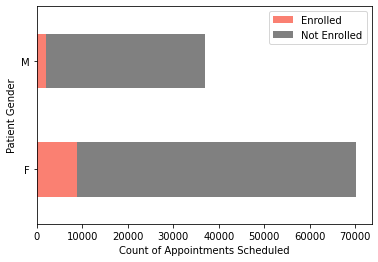

In [79]:

bg_pivot.plot(kind = 'barh', stacked = True, color = ['pink', 'lightblue'])
plt.xlabel('Count of Appointments Scheduled')
plt.ylabel('Bolsa Família Enrollment Status')
plt.legend(['Female', 'Male'], loc = 'upper left')

gb_pivot.plot(kind = 'barh', stacked = True, color = ['salmon', 'grey'])
plt.xlabel('Count of Appointments Scheduled')
plt.ylabel('Patient Gender')
plt.legend(['Enrolled', 'Not Enrolled'], loc = 'upper right')

plt.show()
plt.show()



In [75]:
bg_pivot

gender,F,M
bolsa_familia,,
Enrolled,8826,1983
Not Enrolled,61285,34886


In [76]:
gb_pivot

bolsa_familia,Enrolled,Not Enrolled
gender,,
F,8826,61285
M,1983,34886


Based on the above graphics I only reinforced that more appointments were scheduled by patients that are female and enrolled in the bolsa familia program. 

## What characteristics are most common among patients that do not show up for their appointments?

In [46]:
# Removing the outliers from the age_range column

appt_copy = appt_copy[appt_copy['age_range'] != '90- 100']

In [47]:
# Count the number of occurrences of each age_range where arrival_status == 'Arrived'

age_arrival_status_counts_no = appt_copy[appt_copy['arrival_status'] == 'Arrived'].groupby('age_range')['arrival_status'].count()

In [48]:
# Count the number of occurrences of each age_age where arrival_status == 'Did Not Arrive'

age_arrival_status_counts_yes = appt_copy[appt_copy['arrival_status'] == 'Did Not Arrive'].groupby('age_range')['arrival_status'].count()

In [49]:
# Count the number of occurrences of each age_range

age_arrival_status_overall = appt_copy.groupby('age_range')['arrival_status'].count()

In [50]:
# Calculate the percentage of appointments that were missed by age_range

age_grouped = appt_copy.groupby(['age_range', 'arrival_status']).size().reset_index(name = 'counts')

In [51]:
# Create a pivot table to show the percentage of patients who did not arrive for their appointments

age_pivot = age_grouped.pivot(index = 'age_range', columns = 'arrival_status', values = 'counts')
age_pivot['Arrived'].fillna(0, inplace=True)
age_pivot['Did Not Arrive'].fillna(0, inplace=True)
age_pivot['Overall'] = age_pivot['Arrived'] + age_pivot['Did Not Arrive']
age_pivot['Percent Arrived'] = round((age_pivot['Arrived'] / age_pivot['Overall']) * 100, 2)
age_pivot['Percent Arrived'].fillna(100, inplace=True)

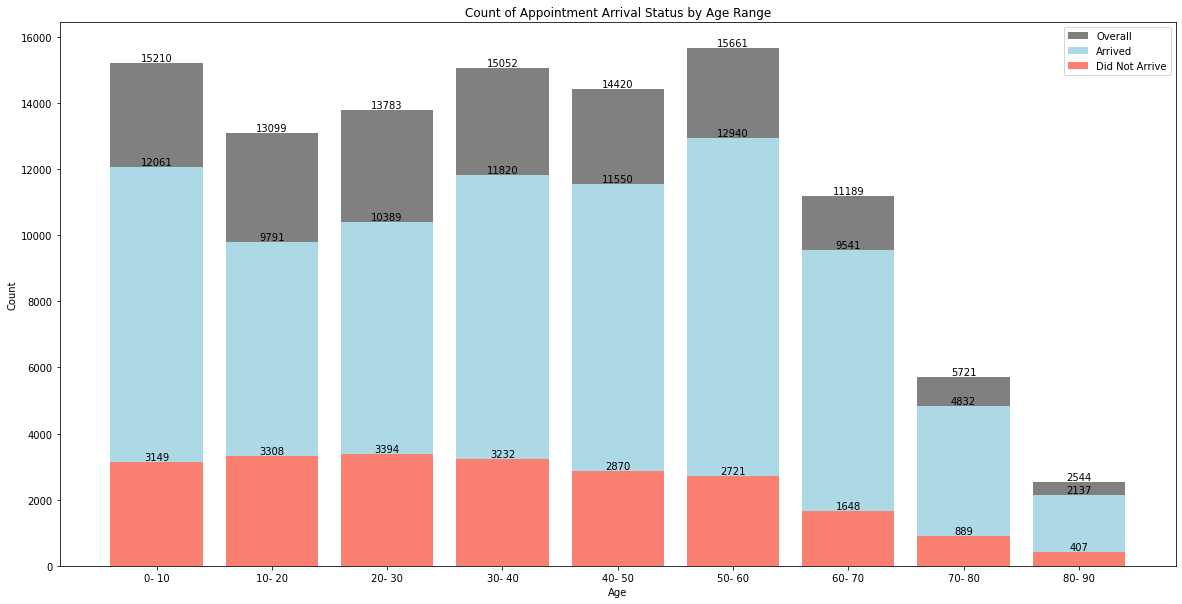

arrival_status,Arrived,Did Not Arrive,Overall,Percent Arrived
age_range,,,,
0- 10,12061,3149,15210,79.30
10- 20,9791,3308,13099,74.75
20- 30,10389,3394,13783,75.38
30- 40,11820,3232,15052,78.53
40- 50,11550,2870,14420,80.10
50- 60,12940,2721,15661,82.63
60- 70,9541,1648,11189,85.27
70- 80,4832,889,5721,84.46
80- 90,2137,407,2544,84.00


In [52]:
# Plot the counts of each age

plt.figure(figsize=(20,10))

plt.bar(age_arrival_status_overall.index, age_arrival_status_overall.values, label = 'Overall', color = 'gray')
plt.bar_label(plt.gca().containers[0], fmt = '%.0f')
plt.bar(age_arrival_status_counts_no.index, age_arrival_status_counts_no.values, label='Arrived', color = 'lightblue')
plt.bar_label(plt.gca().containers[1], fmt = '%.0f')
plt.bar(age_arrival_status_counts_yes.index, age_arrival_status_counts_yes.values, label = 'Did Not Arrive', color = 'salmon')
plt.bar_label(plt.gca().containers[2], fmt = '%.0f')
plt.title('Count of Appointment Arrival Status by Age Range')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Show the plot

plt.show()

# Show the pivot table

age_pivot.head(10)

In [53]:
# Group the data by bolsa_familia and arrival_status and count the occurrences of each combination

bf_grouped = appt_copy.groupby(['bolsa_familia', 'arrival_status']).size().reset_index(name = 'counts')

In [54]:
# Pivot the grouped data to create a table where each row represents a bolsa_familia value and each column represents a arrival_status value

bf_pivot = bf_grouped.pivot(index = 'bolsa_familia', columns = 'arrival_status', values = 'counts')

In [55]:
# Adding a column for the total number of appointments for each bolsa_familia value

bf_pivot['Percent Arrived'] = round((bf_pivot['Arrived'] / (bf_pivot['Did Not Arrive'] + bf_pivot['Arrived'])) * 100, 2)

In [57]:
arrived_bf_grouped = appt_copy.groupby(['arrival_status', 'bolsa_familia']).size().reset_index(name = 'counts')

In [58]:
arrived_bf_pivot = arrived_bf_grouped.pivot(index = 'arrival_status', columns = 'bolsa_familia', values = 'counts')

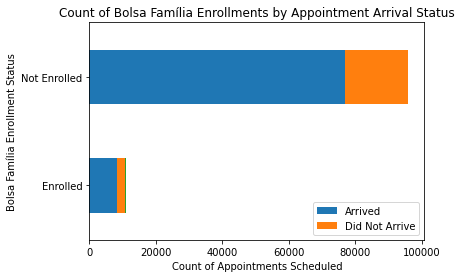

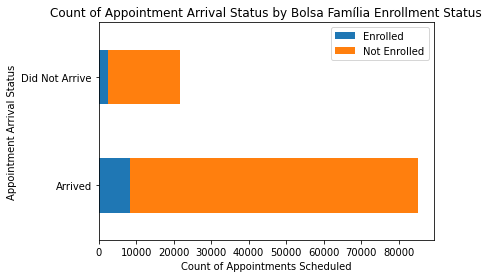

In [87]:
# Plot the pivot table as a stacked bar plot

bf_pivot.plot(kind = 'barh', stacked = True)
plt.xlabel('Count of Appointments Scheduled')
plt.ylabel('Bolsa Família Enrollment Status')
plt.title('Count of Bolsa Família Enrollments by Appointment Arrival Status')
plt.legend(['Arrived', 'Did Not Arrive'], loc = 'lower right')

# Show the plot

plt.show()

# Plot the pivot table as a stacked bar plot

arrived_bf_pivot.plot(kind = 'barh', stacked = True)
plt.xlabel('Count of Appointments Scheduled')
plt.ylabel('Appointment Arrival Status')
plt.title('Count of Appointment Arrival Status by Bolsa Família Enrollment Status')
plt.legend(['Enrolled', 'Not Enrolled'], loc = 'upper right')

# Show the plot

plt.show()

In [88]:
# Show the pivot table

bf_pivot

arrival_status,Arrived,Did Not Arrive,Percent Arrived
bolsa_familia,,,
Enrolled,8238,2571,76.21
Not Enrolled,76823,19047,80.13


In [89]:
# Show the pivot table

arrived_bf_pivot

bolsa_familia,Enrolled,Not Enrolled
arrival_status,,
Arrived,8238,76823
Did Not Arrive,2571,19047


## Conclusions

#### What characteristics are most common among patients that schedule appointments?

1. The number of appointments scheduled decreases consistently and rapidly after age 60. Therefore, most appointments are for individuals under the age of 60.
  
2. Females are significantly more likely to have an appointment than males.  
  
3. Individuals not enrolled in the bolsa familia program are more likely to have an appointment than individuals enrolled in the bolsa familia program.

#### What characteristics are most common among patients that do not show up for their appointments?

1. The number of patients that arrived for their appointments did not differ much across age ranges. The percentage of patients that arrived went up slightly in later age brackets, but the difference was not significant.  

2. Much the same as with the amount of scheduled appointments, the number of pateints arriving for their appointments is much higher for those not enrolled in the bolsa familia program.

##### Limitations

The biggest limitation of this dataset is that a large number of outside factors are not documented. Thus leaving many takeaways based laregly on conjecture as opposed to statistical analysis. I feel that for the analysis to more accurate and informative other datasets would need to be utilised, such as census data, to provide a more complete picture of the population of patients, and perhaps a more complete understanding of the Brasilian welfare program to understand its reach and impact on the population. Without more information, it is difficult to draw any definitive conclusions from this dataset that could actually be impactful.

## OPTIONAL: Question for the reviewer

**Why did I need the update pandas line? I actually needed to comment it out when I was working on it on my local machine, and just left it out of the code entirely.**
**I would also like to request feedback on my choices for visualizations. I am not sure if I chose the best ones.**

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1